In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [113]:
import pandas as pd
import numpy as np
import string
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('bbc-news-data.csv', delimiter='\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [115]:
df['total'] = df['title'] + " " + df['content']
df['total'] = df['total'].astype(str)
df.head()

,category,filename,title,content,total
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit Quarterly p...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,Dollar gains on Greenspan speech The dollar h...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim The owners ...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits British Air...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq Shares in U...


In [116]:
df['category'].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [117]:
df.isnull().sum()

category    0
filename    0
title       0
content     0
total       0
dtype: int64

***Text Preprocessing***

In [118]:
import nltk

In [119]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [120]:
def clean_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [121]:
df['processed'] = df['total'].apply(clean_text)
df.head()

,category,filename,title,content,total,processed
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit Quarterly p...,ad sale boost time warner profit quarterli pro...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,Dollar gains on Greenspan speech The dollar h...,dollar gain greenspan speech dollar hit highes...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim The owners ...,yuko unit buyer face loan claim owner embattl ...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits British Air...,high fuel price hit ba profit british airway b...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq Shares in U...,pernod takeov talk lift domecq share uk drink ...


In [122]:
df['processed'][0]

'ad sale boost time warner profit quarterli profit us media giant timewarn jump 76 three month decemb 639m firm one biggest investor googl benefit sale internet connect higher advert sale timewarn said fourth quarter sale rose 2 profit buoy gain offset profit dip warner bro less user aol time warner said friday own 8 googl internet busi aol mix fortun lost subscrib fourth quarter profit lower preced three quarter howev compani said aol underli profit except item rose 8 back stronger internet advertis revenu hope increas subscrib offer onlin servic free timewarn internet custom tri sign aol exist custom broadband timewarn also restat 2000 2003 result follow probe us secur exchang commiss sec close conclud time warner fourth quarter profit slightli better analyst expect film divis saw profit slump 27 284m help flop alexand catwoman sharp contrast third final film lord ring trilog boost result timewarn post profit 27 2003 perform revenu grew financi perform strong meet exceed object great

**Feature Extraction**

In [123]:
X = df.iloc[:, 5:6]
Y = df['category']

In [124]:
X

,processed
0,ad sale boost time warner profit quarterli pro...
1,dollar gain greenspan speech dollar hit highes...
2,yuko unit buyer face loan claim owner embattl ...
3,high fuel price hit ba profit british airway b...
4,pernod takeov talk lift domecq share uk drink ...
...,...
2220,bt program beat dialler scam bt introduc two i...
2221,spam tempt net shopper comput user across worl...
2222,care code new european direct could put softwa...
2223,us cyber secur chief resign man make sure us c...


In [125]:
Y

0       business
1       business
2       business
3       business
4       business
          ...   
2220        tech
2221        tech
2222        tech
2223        tech
2224        tech
Name: category, Length: 2225, dtype: object

In [126]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [127]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, train_size = 0.8, random_state = 20)


In [129]:
print(X_train.shape)
print(X_test.shape)

(1780, 1)
(445, 1)


**Bag of Words**

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [131]:
X_train_bow = cv.fit_transform(X_train['processed']).toarray()
X_test_bow = cv.transform(X_test['processed']).toarray()

In [132]:
X_train_bow.shape

(1780, 17888)

**TF-IDF**

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [134]:
X_train_tfidf = tfidf.fit_transform(X_train['processed']).toarray()
X_test_tfidf = tfidf.transform(X_test['processed']).toarray()

In [135]:
X_train_tfidf.shape

(1780, 17888)

**KNN**

In [136]:
knn_bow = KNeighborsClassifier(n_neighbors = 5)
knn_bow.fit(X_train_bow, Y_train)
y_pred_knn_bow = knn_bow.predict(X_test_bow)
print(accuracy_score(Y_test, y_pred_knn_bow)*100)

65.61797752808988


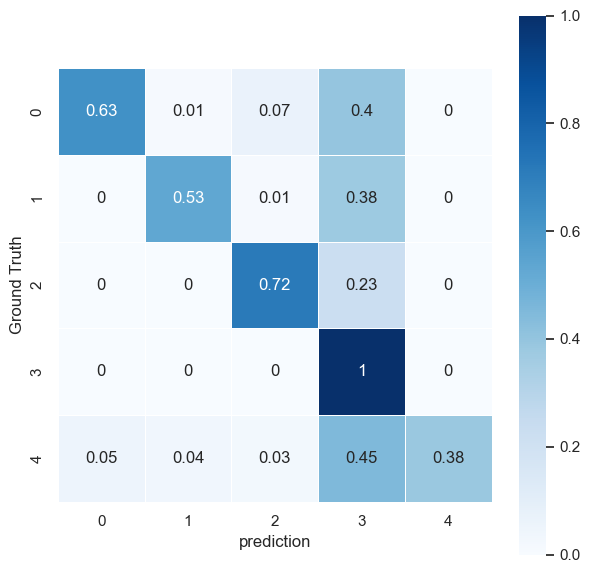

In [137]:
sns.set()
cm = confusion_matrix(Y_test, y_pred_knn_bow)
cm = cm.astype('float')/ cm.sum(axis=1)[: np.newaxis]
annot = np.around(cm, 2)

fig, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, cmap = 'Blues', annot = annot, lw = 0.5)
ax.set_xlabel("prediction")
ax.set_ylabel('Ground Truth')
ax.set_aspect('equal')

In [138]:
knn_tfidf = KNeighborsClassifier(n_neighbors = 5)
knn_tfidf.fit(X_train_tfidf, Y_train)
y_pred_knn_tfidf = knn_tfidf.predict(X_test_tfidf)
print(accuracy_score(Y_test, y_pred_knn_tfidf)*100)

93.25842696629213


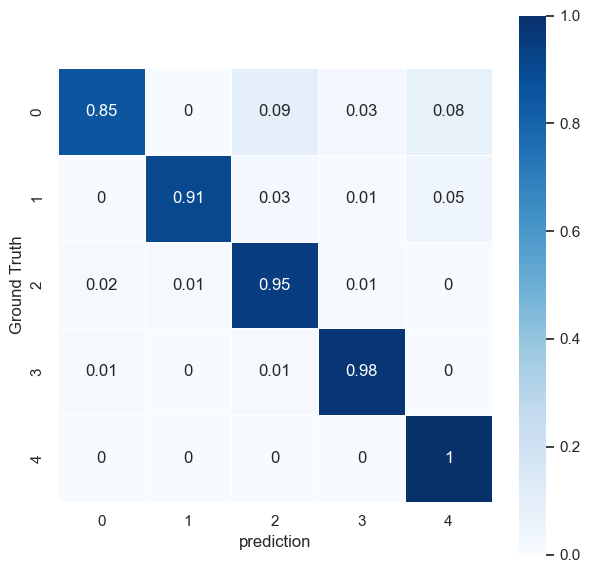

In [139]:
sns.set()
cm = confusion_matrix(Y_test, y_pred_knn_tfidf)
cm = cm.astype('float')/ cm.sum(axis=1)[: np.newaxis]
annot = np.around(cm, 2)

fig, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, cmap = 'Blues', annot = annot, lw = 0.5)
ax.set_xlabel("prediction")
ax.set_ylabel('Ground Truth')
ax.set_aspect('equal')

**Naive Bayes**

In [140]:
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, Y_train)
y_pred_nb_bow = nb_bow.predict(X_test_bow)
print(accuracy_score(Y_test, y_pred_nb_bow)*100)

96.85393258426967


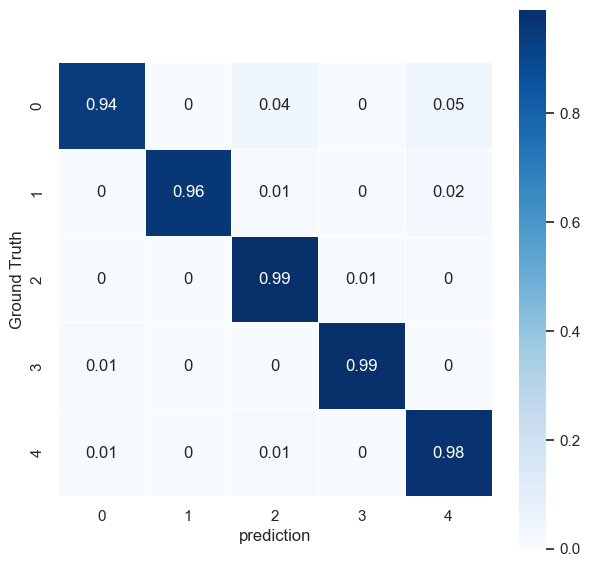

In [141]:
sns.set()
cm = confusion_matrix(Y_test, y_pred_nb_bow)
cm = cm.astype('float')/ cm.sum(axis=1)[: np.newaxis]
annot = np.around(cm, 2)

fig, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, cmap = 'Blues', annot = annot, lw = 0.5)
ax.set_xlabel("prediction")
ax.set_ylabel('Ground Truth')
ax.set_aspect('equal')

In [142]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, Y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
print(accuracy_score(Y_test, y_pred_nb_tfidf)*100)

95.28089887640449


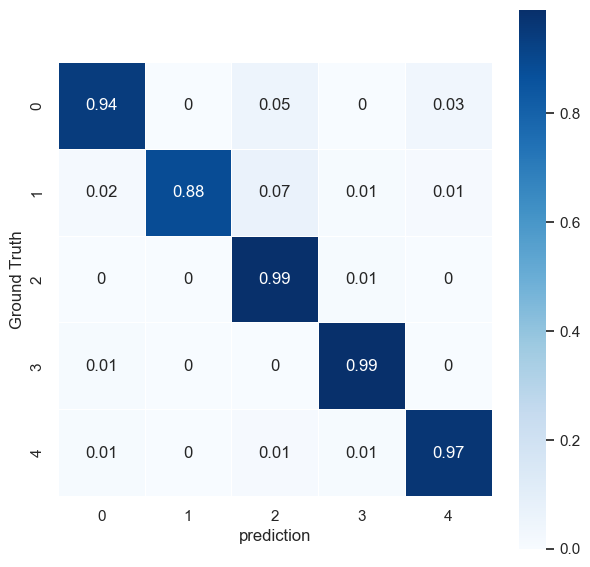

In [143]:
sns.set()
cm = confusion_matrix(Y_test, y_pred_nb_tfidf)
cm = cm.astype('float')/ cm.sum(axis=1)[: np.newaxis]
annot = np.around(cm, 2)

fig, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, cmap = 'Blues', annot = annot, lw = 0.5)
ax.set_xlabel("prediction")
ax.set_ylabel('Ground Truth')
ax.set_aspect('equal')

In [155]:
import pickle
pickle.dump(cv, open('bow.pkl', 'wb'))
pickle.dump(nb_bow, open('nbmodel.pkl', 'wb'))